In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

In [2]:
n = 100
d = 20

In [3]:
x = torch.randn((n, d)) / (d ** 0.5)
w = torch.zeros(d)
w[:5] = 20
w[5:10] = -20
pre_activation = torch.sum(w * x, dim=1)
activation = torch.sigmoid(pre_activation)
y = torch.sign(pre_activation)

In [4]:
# Logistic regression with stochastic gradient descent
model = SGDClassifier(penalty=None)
model.fit(x, y)

SGDClassifier(penalty=None)

In [5]:
w_hat = model.coef_[0]

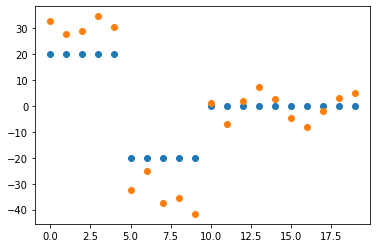

In [6]:
plt.scatter(torch.arange(d), w)
plt.scatter(torch.arange(d), w_hat)

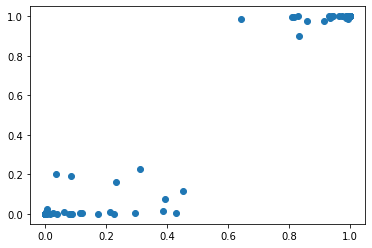

In [7]:
activation_hat = torch.sigmoid(torch.sum(torch.from_numpy(w_hat) * x, dim=1))
plt.scatter(activation, activation_hat)

In [8]:
df = pd.DataFrame()
df["index"] = torch.arange(1, len(w)+1)
df["w_star"] = w
df["w_hat"] = w_hat

In [9]:
df.to_csv("../data/log_reg_estimator_indices.csv", index=False)
df

,index,w_star,w_hat
0,1,20.0,32.901895
1,2,20.0,27.961733
2,3,20.0,29.208027
3,4,20.0,34.728541
4,5,20.0,30.760952
5,6,-20.0,-32.516124
6,7,-20.0,-25.048269
7,8,-20.0,-37.459112
8,9,-20.0,-35.332299
9,10,-20.0,-41.655652


In [10]:
df = pd.DataFrame()
df["true_prob"] = activation
df["pred_prob"] = activation_hat

In [11]:
df.to_csv("../data/log_reg_estimator_overconfident.csv", index=False)
df

,true_prob,pred_prob
0,0.975313,9.999993e-01
1,0.932167,9.999873e-01
2,0.999923,9.999320e-01
3,1.000000,1.000000e+00
4,0.998229,9.999967e-01
...,...,...
95,0.000001,2.468948e-10
96,0.999997,1.000000e+00
97,0.000002,4.493978e-10
98,0.963619,9.999131e-01
